In [ ]:
# for google colab
from google.colab import drive
# mount your Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# for google colab
# copy all files from "ML_Models" directory in Google drive to current directory
!cp -r ./gdrive/MyDrive/"For student"/"ML_Models"/* .

In [ ]:
import dataset
import model
import detection
import matplotlib.pyplot as plt

### Part 1
Implement loadImages function in dataset.py and test the following code

Loading images
The number of training samples loaded: 600
The number of test samples loaded: 600
Show the first and last images of training dataset


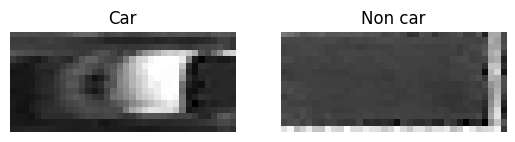

In [ ]:
print('Loading images')
train_data = dataset.load_images('data/train')
print(f'The number of training samples loaded: {len(train_data)}')
test_data = dataset.load_images('data/test')
print(f'The number of test samples loaded: {len(test_data)}')

print('Show the first and last images of training dataset')
fig, ax = plt.subplots(1, 2)
ax[0].axis('off')
ax[0].set_title('Car')
ax[0].imshow(train_data[1][0], cmap='gray')
ax[1].axis('off')
ax[1].set_title('Non car')
ax[1].imshow(train_data[-1][0], cmap='gray')
plt.show()

In [ ]:
with open('GroundTruth.txt','r')as file:
    lines = file.readlines()

gt = []
for line in lines[:]:
  gt.append(list(map(int,line.strip().split())))

In [ ]:
# TP TN FP FN
def good(model_name,parameter):
  arr = []
  with open(model_name + '_'+ str(parameter) + '_pred.txt','r')as file:
    lines = file.readlines()

  for line in lines[:]:
    arr.append(list(map(int,line.strip().split())))

  TP,TN,FP,FN = 0,0,0,0
  for i in range(50):
    for j in range(len(gt[0])):
      if gt[i][j] == 1 and arr[i][j] == 1:
        TP += 1

      elif gt[i][j] == 0 and arr[i][j] == 0:
        TN += 1

      elif gt[i][j] == 1 and arr[i][j] == 0:
        FP += 1

      elif gt[i][j] == 0 and arr[i][j] == 1:
        FN += 1
  TP /= 50*76
  TN /= 50*76
  FP /= 50*76
  FN /= 50*76
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  F1_score = 2 * (precision * recall) / (precision + recall)
  accuracy = TP + TN
  return [TP,TN,FP,FN,precision,recall,F1_score,accuracy]


### Part 2
Build and train 3 kinds of classifiers: KNN, Random Forest and Adaboost.

In [ ]:
car_clf = model.CarClassifier(
    model_name="AB", # KNN, RF (Random Forest) or AB (AdaBoost)
    train_data=train_data,
    test_data=test_data
)
car_clf.train()
car_clf.eval()

Accuracy: 0.9517
Confusion Matrix: 
[[288  17]
 [ 12 283]]


### Part 3
Modify difference values at parameter n_neighbors of KNeighborsClassifier, n_estimators of RandomForestClassifier and AdaBoostClassifier, and find better results.

In [ ]:
output = open('part3.txt', 'w')
lis = good('KNN',3)

output.write(f"n_neightbors = {i}\nTP:{lis[0]:.5f}\nTN:{lis[1]:.5f}\nFP:{lis[2]:.5f}\nFN:{lis[3]:.5f}\nprecision:{lis[4]:.5f}\nrecall:{lis[5]:.5f}\nF1_score:{lis[6]:.5f}\naccuracy:{lis[7]:.5f}\n\n")
  

### Part 4
Implement detect function in detection.py and test the following code.


Use your classifier with video.gif to get the predictions (one .txt and one .png)


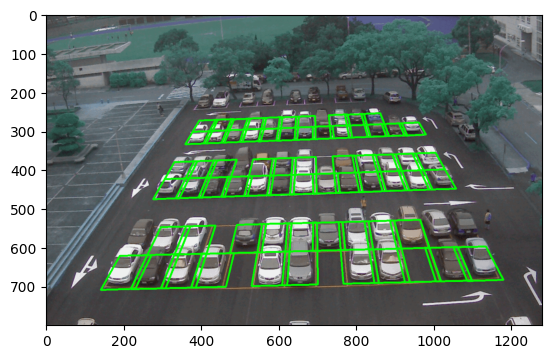

In [ ]:
print('\nUse your classifier with video.gif to get the predictions (one .txt and one .png)')
detection.detect('data/detect/detectData.txt', car_clf)

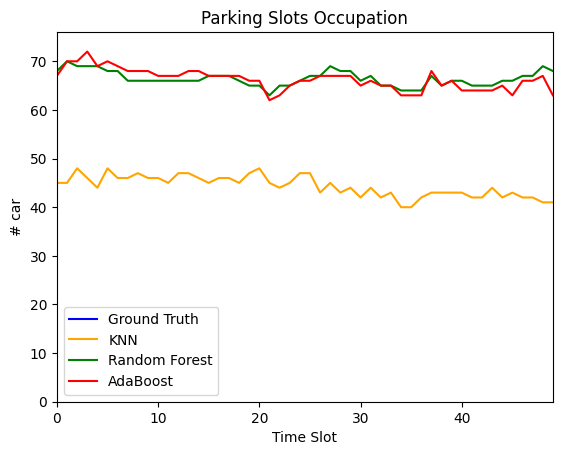

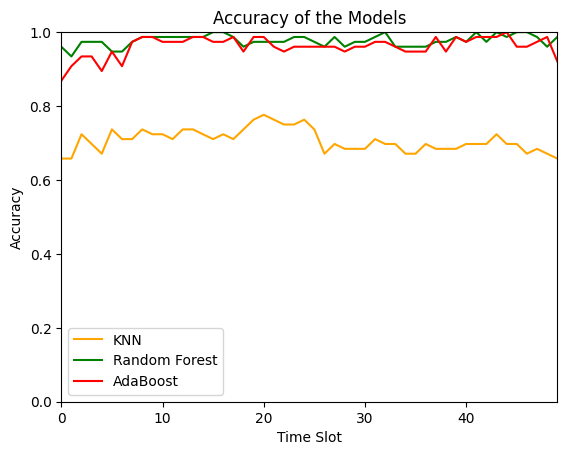

In [ ]:
#show parking slot
gt_sum =[]
knn_sum = []
rf_sum = []
ab_sum = []

with open('KNN_pred.txt','r')as file:
  lines = file.readlines()

knn = []
for line in lines[:]:
  knn.append(list(map(int,line.strip().split())))
  knn_sum.append(sum(list(map(int,line.strip().split()))))

with open('RF_pred.txt','r')as file:
  lines = file.readlines()

rf = []
for line in lines[:]:
  rf.append(list(map(int,line.strip().split())))
  rf_sum.append(sum(list(map(int,line.strip().split()))))

with open('AB_pred.txt','r')as file:
  lines = file.readlines()

ab = []
for line in lines[:]:
  ab.append(list(map(int,line.strip().split())))
  ab_sum.append(sum(list(map(int,line.strip().split()))))



plt.figure()
plt.plot(gt_sum, label = 'Ground Truth', color = 'blue')
plt.plot(knn_sum, label = 'KNN', color = 'orange')
plt.plot(rf_sum, label = 'Random Forest', color = 'green')
plt.plot(ab_sum, label = 'AdaBoost', color = 'red')

plt.xlabel('Time Slot')
plt.ylabel('# car')
plt.xlim((0,49))
plt.ylim((0,76))
plt.title('Parking Slots Occupation')
plt.legend()
plt.savefig('Parking_Slots_Occupation.png')
plt.show()

#show accuracy

knn_acc = []

for i in range(50):
  x = 0
  for j in range(len(gt[0])):
    if gt[i][j] == knn[i][j]:
      x += 1

  knn_acc.append(x / len(gt[0]))

rf_acc = []
for i in range(50):
  x = 0
  for j in range(len(gt[0])):
    if gt[i][j] == rf[i][j]:
      x += 1

  rf_acc.append(x / len(gt[0]))
ab_acc = []
for i in range(50):
  x = 0
  for j in range(len(gt[0])):
    if gt[i][j] == ab[i][j]:
      x += 1

  ab_acc.append(x / len(gt[0]))


plt.figure()
plt.plot(knn_acc, label = 'KNN', color = 'orange')
plt.plot(rf_acc, label = 'Random Forest', color = 'green')
plt.plot(ab_acc, label = 'AdaBoost', color = 'red')

plt.xlabel('Time Slot')
plt.ylabel('Accuracy')
plt.xlim((0,49))
plt.ylim((0,1))
plt.title('Accuracy of the Models')
plt.legend()
plt.savefig('/Accuracy.png')
plt.show()

In [ ]:
# for google colab
# REMEMBER to execute this line once you've modified any .py code!
# Save the .py code you have modified to your Google Drive
!cp ./*.py ./gdrive/MyDrive/"For student"/"ML_Models"/
!cp ./*.txt ./gdrive/MyDrive/"For student"/"ML_Models"/
!cp ./*.png ./gdrive/MyDrive/"For student"/"ML_Models"/